# Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
# This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
# Explore and analyze the data to discover key understandings (not limited to these) such as :
What can we learn about different hosts and areas?

What can we learn from predictions? (ex: locations, prices, reviews, etc)

Which hosts are the busiest and why?

Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#
df = pd.read_csv('/content/drive/My Drive/Airbnb.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


For Nan Values in column reviews_per_month,replacing Nan with 0

In [9]:
df.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


## Data Wrangling

In [10]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df['name'].fillna(value='Not provided',inplace=True)

In [12]:
df['last_review'].fillna(value='No reviews yet',inplace=True)

In [13]:
df['host_name'].fillna(value='Not provided',inplace=True)

In [14]:
df.fillna({'reviews_per_month':0},inplace=True)

In [15]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Scatter Plot to show the neighbourhood group based on Latitude and Longitude

We will plot the latitude and longitude in a scatter plot to have the cluster of the location, 

### Unique Values

It is very important to understand and analyze the Unique values, this gives a lot of insight to the data and the user preference for a particular choice. We will take Room Type and Neighbourhood group

 From the below, we have 3 types of room in the dataset and 5 different neighbourhood group. In the next section we will explore more on these two categories to understand the user distribution.bold text

In [16]:
print('Unique value for room_type are :',df.room_type.unique())
print('Unique value for neighbourhood_group are :',df.neighbourhood_group.unique())

Unique value for room_type are : ['Private room' 'Entire home/apt' 'Shared room']
Unique value for neighbourhood_group are : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


**1)Room Types and Neighbourhood Group**

We will first check the distribution of the room type by grouping the data. It is clear from below the Apartment and Private data is more than that of shared rooms. In general, Shared rooms costs less and can be very useful for travellers who moves from one city to another city quite frequently. Though the shared rooms data is less, we will still try to uncover as much details as we can.

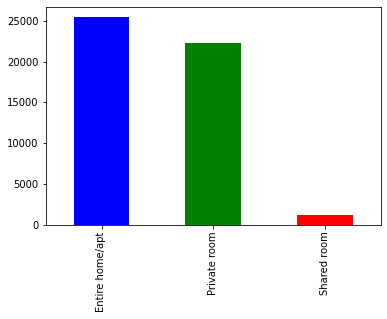

In [17]:
df['room_type'].value_counts().plot(kind='bar',color=['b','g','r'])
plt.show()


## 2) It is observed from below Manhattan and Brooklyn has more number of listing that the Queens,Bronx and Staten island.

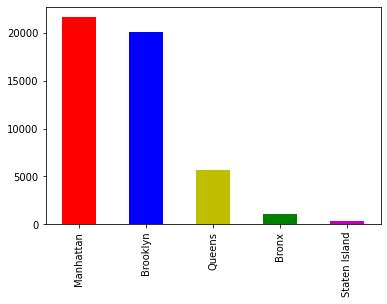

In [18]:
df['neighbourhood_group'].value_counts().plot(kind='bar',color=['r','b','y','g','m'])
plt.show()


In [19]:
 
avg_price_df = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


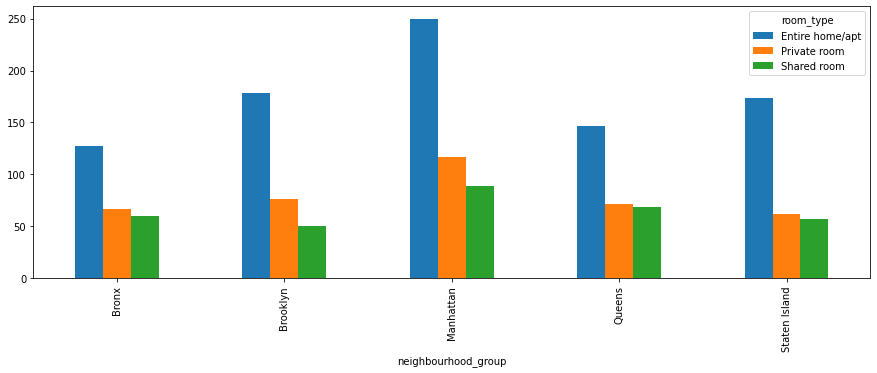

In [20]:
avg_price_df.plot.bar(figsize=(15,5))

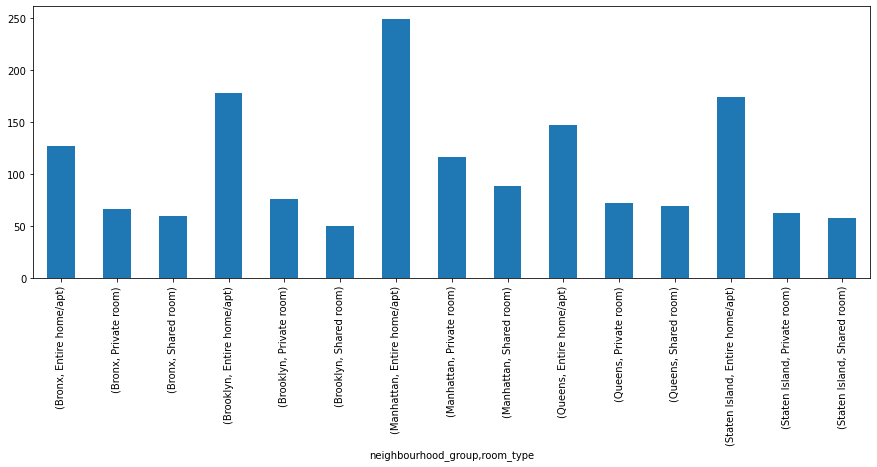

In [21]:
#Another way of getting the same conclusion
avg_df = df.pivot_table(values='price',index='room_type',columns='neighbourhood_group',aggfunc='mean')
rdf=avg_df.unstack()
rdf
rdf.plot.bar(figsize=(15,5))

## 3) Below the Average Price per night based on the neighbourhood group is displayed


In [22]:
# Let's check if there is any null value presentin the price column and from the below, it looks like we don't have any null value to take care of.

df.price.isnull().sum()

0

In [23]:
#It is seen below that the price range starts from 0$ to 180$.But there also exists price which has a maximum of $10000. This we cannot discard as an outlier because there are many scenarios in which price differs. The price varies on different factors which includes location,room type, neighbourhood , season etc. Also, we can see from the below there are few few values with 0, which can be due to dynamic pricing or the willingness of not to share the price with the Airbnb.

df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [24]:
df1 = df[df['minimum_nights']==1]
df2 = df1.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df2).sort_values(by='room_type')

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

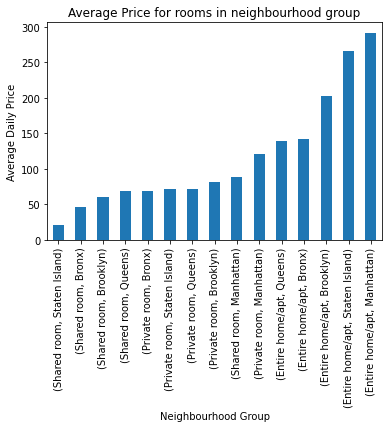

In [25]:
df2.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()

In [26]:
df['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

#4)Top 10 neighborhood_groups having maximum number of appartments listed on airbnb.

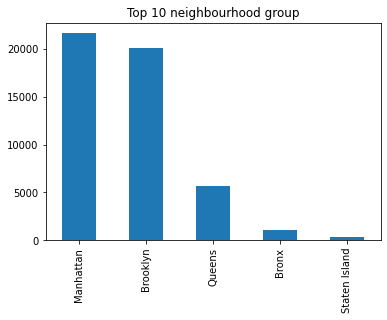

In [27]:
plt.title('Top 10 neighbourhood group')
pd.value_counts(df['neighbourhood_group'])[:10].plot.bar()


In [28]:
sorted_df = df.sort_values(by='host_name',ascending=False)

## 5)Top 5 Host owning maximum number of apartments 

In [29]:
host_df=df.groupby('host_name')
counts = host_df['host_id'].count()
counts = counts.sort_values(ascending=False)
Count=(counts.head(5))
pd.DataFrame(Count)

,host_id
host_name,
Michael,417
David,403
Sonder (NYC),327
John,294
Alex,279


#6) Location wise distribution of neighbourhood groups based on the provided latitude and longitude.

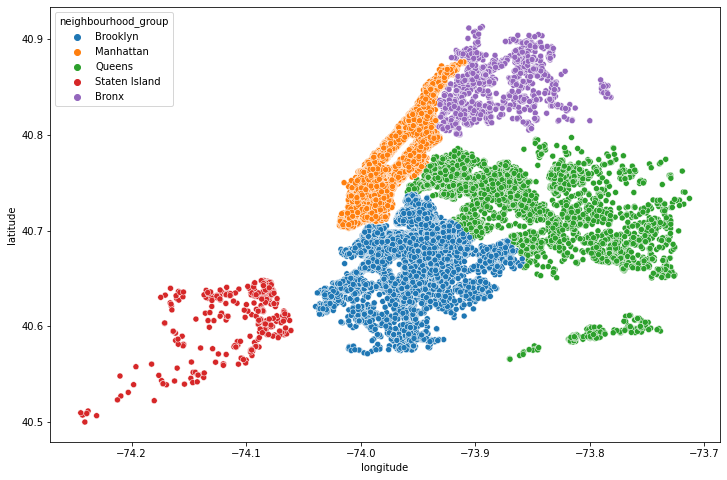

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

#The distribution of the room type and its distribution over the location.

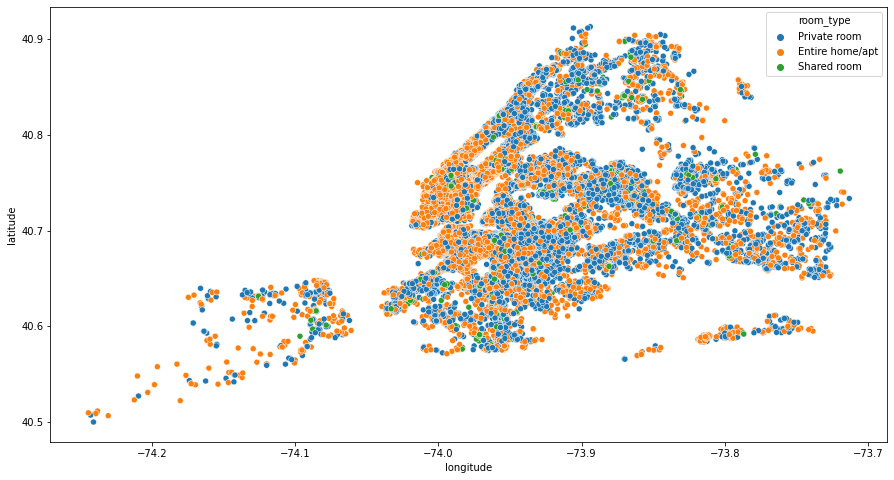

In [31]:
plt.figure(figsize=(15,8))
r_type=sns.scatterplot(x=df['longitude'],y=df['latitude'], hue=df['room_type'])
plt.show()

## 7)Listing of top 10 neighbourhood  posted based on the count

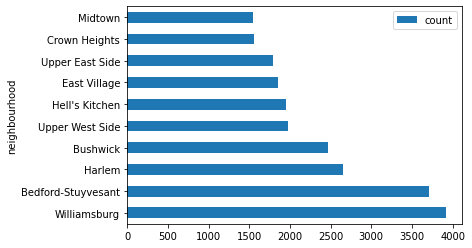

,count
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564


In [32]:
max_loc_df = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count'])['host_name'].sort_values(by='count',ascending=False)
max_loc_df.rename(index=str,columns={'Count':'Listing Count'})
max_loc_df.head(10).plot(kind='barh')
plt.show()
pd.DataFrame(max_loc_df.head(10))

## 8)Top 5 host based on the number of reviews.

Based on the number of reviews(Minimum 50) we will plot, who is our top 5 Host, this increases the confidence of tourist before booking.

Also lets plot based on the lattitude and location of our review data.

In [38]:
grouped_df = df.groupby(['host_id','host_name'],as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending = False)

review_df=grouped_df.head(5)
review_df



,host_id,host_name,number_of_reviews
21316,37312959,Maya,2273
1052,344035,Brooklyn& Breakfast -Len-,2205
18636,26432133,Danielle,2017
20884,35524316,Yasu & Akiko,1971
21934,40176101,Brady,1818


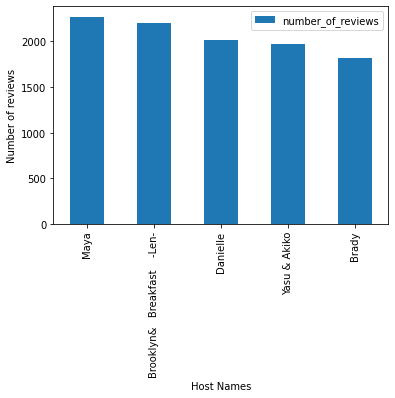

In [34]:
review_df.plot(kind='bar',x='host_name',y='number_of_reviews')
plt.ylabel('Number of reviews')
plt.xlabel('Host Names')
plt.show()

In [40]:
host_reviews = df.groupby("host_id")["number_of_reviews"].count()
host_reviews = host_reviews.sort_values(ascending=False)
top_5_hosts = host_reviews.head(5)
top_5_hosts

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: number_of_reviews, dtype: int64

##9)Top 10 least and most expensive neighborhoods

In [35]:
mean_price_by_neighbourhood = df.groupby(['neighbourhood','neighbourhood_group'])['price'].mean().reset_index()
mean_price_by_neighbourhood = mean_price_by_neighbourhood.sort_values(by='price', ascending=True)
top_10_least_expensive_neighbourhoods = mean_price_by_neighbourhood.head(10)

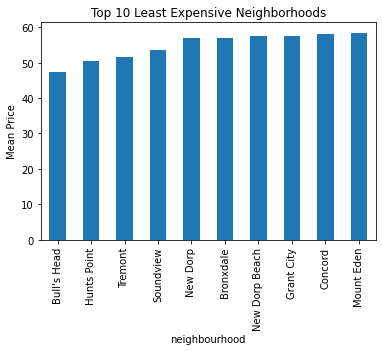

In [36]:
top_10_least_expensive_neighbourhoods.plot(kind='bar', x='neighbourhood', y='price', legend=False)
plt.ylabel('Mean Price')
plt.title('Top 10 Least Expensive Neighborhoods')
plt.show()

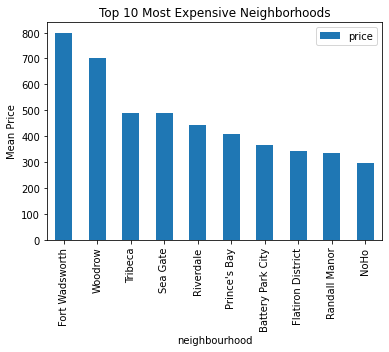

In [37]:

most_exp_neighbourhood=mean_price_by_neighbourhood.sort_values(by='price', ascending=False)[:10]
most_exp_neighbourhood.plot(kind='bar',x='neighbourhood',y='price')
plt.ylabel('Mean Price')
plt.title('Top 10 Most Expensive Neighborhoods')
plt.show()

